In [1]:
import xport

import numpy as np
import scipy as scp

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Setup 
# sns.set(color_codes=True)
%matplotlib inline

In [2]:
# Load demographics dataset
with open("../../../data/nhanes/2011_2012/DEMO_G.XPT", 'rb') as f:
    demo_df = xport.to_dataframe(f)

print(demo_df.shape)    
demo_df.head()

(9756, 48)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGY,...,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU
0,62161.0,7.0,2.0,1.0,22.0,NaN,3.0,3.0,2.0,NaN,...,5.0,0.0,1.0,0.0,2.0,50.0,1.0,5.0,1.0,5.0
1,62162.0,7.0,2.0,2.0,3.0,NaN,1.0,1.0,1.0,3.0,...,6.0,2.0,2.0,0.0,2.0,24.0,1.0,3.0,6.0,NaN
2,62163.0,7.0,2.0,1.0,14.0,NaN,5.0,6.0,2.0,14.0,...,5.0,0.0,2.0,1.0,1.0,42.0,1.0,5.0,1.0,4.0
3,62164.0,7.0,2.0,2.0,44.0,NaN,3.0,3.0,1.0,NaN,...,5.0,1.0,2.0,0.0,1.0,52.0,1.0,4.0,1.0,4.0
4,62165.0,7.0,2.0,2.0,14.0,NaN,4.0,4.0,2.0,14.0,...,5.0,1.0,2.0,0.0,2.0,33.0,2.0,2.0,77.0,NaN


In [3]:
# Load drug dataset
with open("../../../data/nhanes/2011_2012/DUQ_G.XPT", 'rb') as f:
    drug_df = xport.to_dataframe(f)

print(drug_df.shape)
drug_df.head()

(4796, 42)


,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,...,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430
0,62161.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62169.0,1.0,19.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,62172.0,1.0,21.0,2.0,NaN,NaN,NaN,NaN,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,62176.0,1.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


## Clean the data
1. Refused to give any information
2. Did not fill out the information

In [4]:
# Do you use marijuana every month for a year? Measures continued usage 
clean_drug_df = drug_df.loc[(drug_df.DUQ211 == 1) | (drug_df.DUQ211 == 2)]

print(clean_drug_df.shape)
clean_drug_df.head()

(1771, 42)


,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,...,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430
2,62169.0,1.0,19.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,62172.0,1.0,21.0,2.0,NaN,NaN,NaN,NaN,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,62176.0,1.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6,62179.0,1.0,20.0,2.0,NaN,NaN,NaN,NaN,NaN,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
11,62199.0,1.0,19.0,2.0,NaN,NaN,NaN,NaN,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [5]:
# Education level for adults (20+)
clean_demo_df = demo_df.loc[(demo_df.DMDEDUC2 != 7) & (demo_df.DMDEDUC2 != 9)] # remove refused or don't know

# Drop NaN values
usecols = ['SEQN', 'DMDEDUC2']
demo_df_dropna = clean_demo_df[usecols].dropna()

print(clean_demo_df.shape)
print(demo_df_dropna.shape)
demo_df_dropna.head()

(9751, 48)
(5555, 2)


,SEQN,DMDEDUC2
0,62161.0,3.0
3,62164.0,4.0
8,62169.0,3.0
11,62172.0,3.0
13,62174.0,5.0


## Merge the datasets

In [6]:
combined_dataset = pd.merge(clean_drug_df, demo_df_dropna, on="SEQN")
total_responders = combined_dataset.shape[0]

print(combined_dataset.shape)
combined_dataset.head()

(1622, 43)


,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,...,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430,DMDEDUC2
0,62169.0,1.0,19.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0
1,62172.0,1.0,21.0,2.0,NaN,NaN,NaN,NaN,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0
2,62176.0,1.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0
3,62179.0,1.0,20.0,2.0,NaN,NaN,NaN,NaN,NaN,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0
4,62199.0,1.0,19.0,2.0,NaN,NaN,NaN,NaN,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0


In [7]:
# Determine number of datapoints for each type of pregnancy status
labels, counts = np.unique(combined_dataset['DMDEDUC2'], return_counts=True)
print(labels, counts)

[ 1.  2.  3.  4.  5.] [ 32 224 339 604 423]


In [48]:
a_0d_1 = combined_dataset.loc[(combined_dataset.DUQ211 == 1) & (combined_dataset.DMDEDUC2 <= 3)] # not college
a_1d_0 = combined_dataset.loc[(combined_dataset.DUQ211 == 1) & (combined_dataset.DMDEDUC2 >= 4)] # college

print(a_0d_1.shape)
print(a_1d_0.shape)

risk_ratio = ((len(a_1d_0)/total_responders)) / ((len(a_0d_1)/total_responders))
risk_diff = ((len(a_1d_0)/total_responders)) - ((len(a_0d_1)/total_responders))
print(risk_ratio)
print(risk_diff)
# print(sub_additive)

(368, 43)
(430, 43)
1.1684782608695652
0.03822441430332921


## Plot histograms

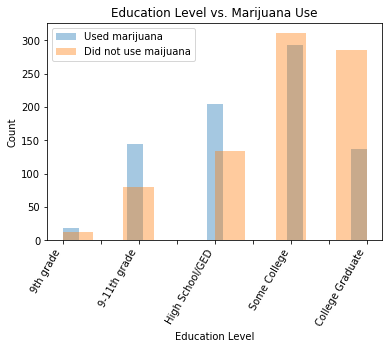

In [44]:
# Assuming the label here is marijuana use every month for a year (1-YES, 2-NO)
use_marijuana = combined_dataset.loc[(combined_dataset.DUQ211 == 1.0)] # Extract all cases of marijuana
non_use_marijuana = combined_dataset.loc[(combined_dataset.DUQ211 == 2.0)]

ax = sns.distplot(use_marijuana.DMDEDUC2, kde=False, norm_hist=False, label='Used marijuana')
ax = sns.distplot(non_use_marijuana.DMDEDUC2, kde=False, norm_hist=False, label='Did not use maijuana')
xlabels = ['', '9th grade', '', '9-11th grade', '', 'High School/GED', '', 
           'Some College', '', 'College Graduate']
ax.set_title('Education Level vs. Marijuana Use')
ax.set_xticklabels(xlabels, ha='right', rotation='60', minor=False)
ax.set_xlabel('Education Level')
ax.set_ylabel('Count')
ax.legend(loc='best')

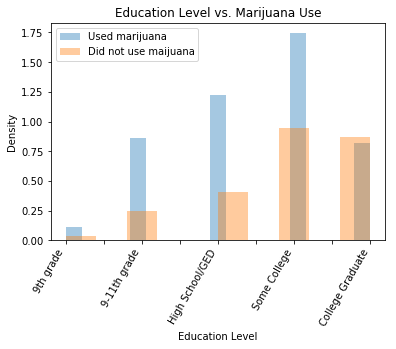

In [45]:
ax = sns.distplot(use_marijuana.DMDEDUC2, kde=False, norm_hist=True, label='Used marijuana')
ax = sns.distplot(non_use_marijuana.DMDEDUC2, kde=False, norm_hist=True, label='Did not use maijuana')
ax.set_title('Education Level vs. Marijuana Use')
ax.set_xticklabels(xlabels, ha='right', rotation='60', minor=False)
ax.set_xlabel('Education Level')
ax.set_ylabel('Density')
ax.legend(loc='best')

In [46]:
use_marijuana.shape

(798, 43)

In [47]:
non_use_marijuana.shape

(824, 43)